PART 1: DATA PREPARATION & ELBOW METHOD

✓ Dataset loaded: 2216 rows, 29 columns
✓ Numeric features: 26 features
✓ Features scaled successfully

FINDING OPTIMAL NUMBER OF CLUSTERS (K)
K=2: Inertia=41885.93, Silhouette Score=0.2531
K=3: Inertia=38319.13, Silhouette Score=0.1768
K=4: Inertia=35774.42, Silhouette Score=0.1807
K=5: Inertia=33760.06, Silhouette Score=0.1822
K=6: Inertia=32611.29, Silhouette Score=0.1716
K=7: Inertia=30287.42, Silhouette Score=0.1191
K=8: Inertia=29145.04, Silhouette Score=0.1261
K=9: Inertia=28342.00, Silhouette Score=0.1217
K=10: Inertia=27414.65, Silhouette Score=0.1239


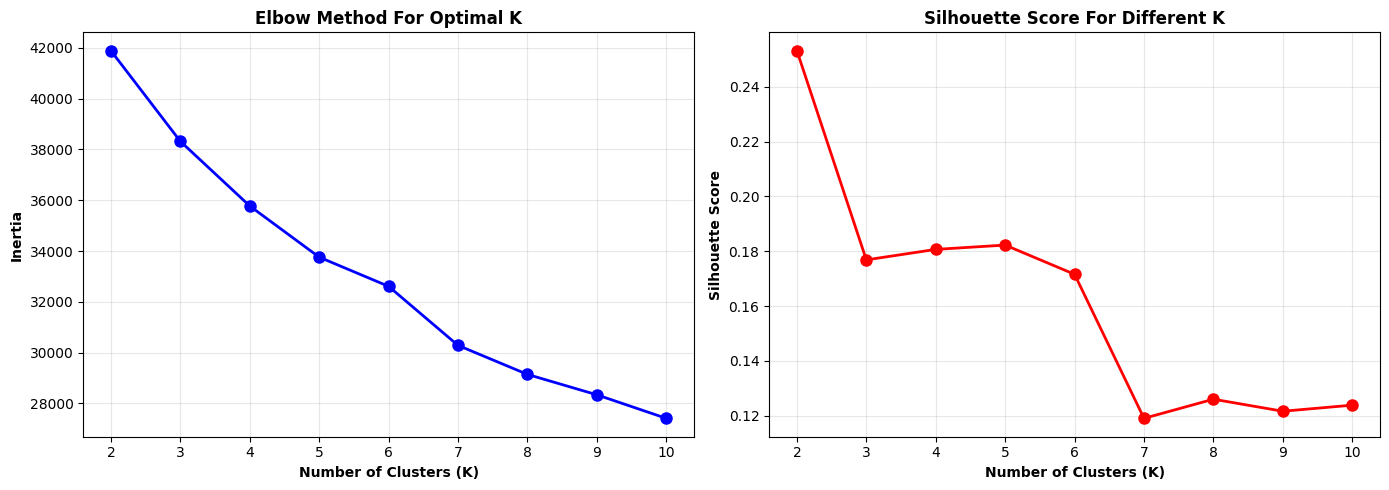


✓ Visualization saved: 01_elbow_curve.png
✓ Recommendation: Based on elbow curve, K=3 appears optimal


In [13]:
# Customer Segmentation: Clustering Analysis 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

warnings.filterwarnings('ignore')

# Path setup
data_path = 'D:\\coursera-assigment\\marketing_dataset\\'
output_path = 'D:\\coursera-assigment\\Course 4 - Unsupervised\\result\\'

# Create output folder if it doesn't exist
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Load dataset
df = pd.read_csv(data_path + 'marketing_campaign.csv', sep=None, engine='python')
df = df.dropna()

print("="*70)
print("PART 1: DATA PREPARATION & ELBOW METHOD")
print("="*70)
print(f"\n✓ Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")

# Select numeric features
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"✓ Numeric features: {len(numeric_features)} features")

# Standardize features
X = df[numeric_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=numeric_features)

print("✓ Features scaled successfully")

# Elbow Method - Find optimal K
print("\n" + "="*70)
print("FINDING OPTIMAL NUMBER OF CLUSTERS (K)")
print("="*70)

inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    sil_score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(sil_score)
    print(f"K={k}: Inertia={kmeans.inertia_:.2f}, Silhouette Score={sil_score:.4f}")

# Plot Elbow Curve
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (K)', fontweight='bold')
axes[0].set_ylabel('Inertia', fontweight='bold')
axes[0].set_title('Elbow Method For Optimal K', fontweight='bold')
axes[0].grid(True, alpha=0.3)

axes[1].plot(K_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (K)', fontweight='bold')
axes[1].set_ylabel('Silhouette Score', fontweight='bold')
axes[1].set_title('Silhouette Score For Different K', fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(output_path + '01_elbow_curve.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualization saved: 01_elbow_curve.png")
print("✓ Recommendation: Based on elbow curve, K=3 appears optimal")


PART 2: TRAINING & COMPARING 3 CLUSTERING MODELS

✓ K-Means: Found 3 clusters
✓ Hierarchical: Found 3 clusters
✓ DBSCAN: Found 12 clusters (noise points: 1426)

CLUSTERING MODEL COMPARISON METRICS
       Model  Clusters  Silhouette Score  Davies-Bouldin Index  Calinski-Harabasz Index
     K-Means         3          0.176845              2.182451               429.236919
Hierarchical         3          0.194735              2.290382               358.890339
      DBSCAN        12               NaN                   NaN                      NaN

✓ Results saved: model_comparison_results.csv

✓ Explained variance ratio by 2 PCs: 35.73%


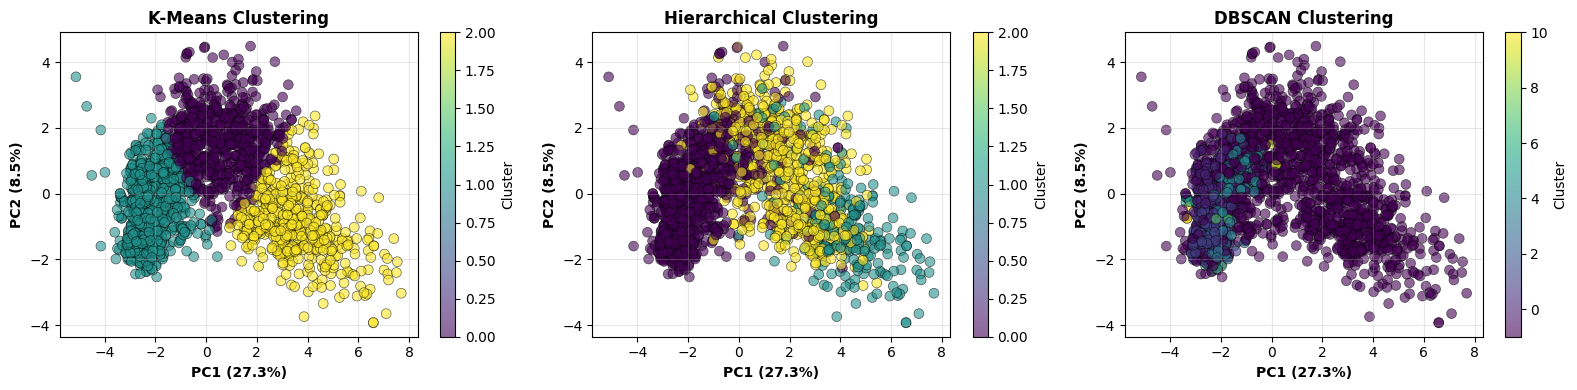


✓ Visualization saved: 02_clustering_comparison_pca.png


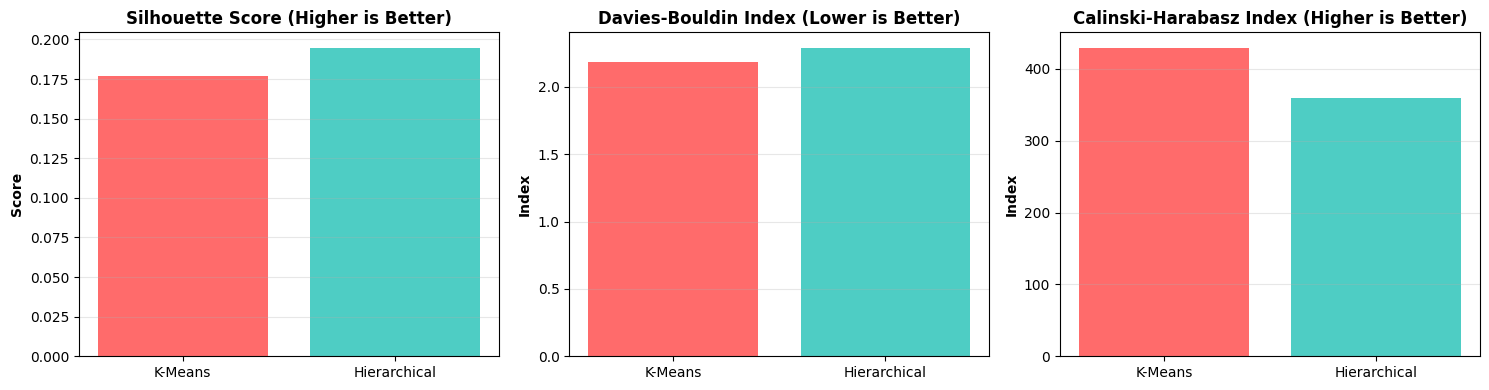

✓ Visualization saved: 03_metrics_comparison.png

✓ BEST MODEL SELECTED: Hierarchical


In [14]:
# Training 3 Clustering Models & Comparison

from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Using variables from CELL 1: df, numeric_features, X_scaled

print("\n" + "="*70)
print("PART 2: TRAINING & COMPARING 3 CLUSTERING MODELS")
print("="*70)

# 1. K-Means Clustering (K=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# 2. Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X_scaled)

# 3. DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

print(f"\n✓ K-Means: Found {len(np.unique(kmeans_labels))} clusters")
print(f"✓ Hierarchical: Found {len(np.unique(hierarchical_labels))} clusters")
print(f"✓ DBSCAN: Found {len(np.unique(dbscan_labels))} clusters (noise points: {np.sum(dbscan_labels==-1)})")

# Calculate Metrics
models_data = []

for name, labels in [('K-Means', kmeans_labels), 
                      ('Hierarchical', hierarchical_labels), 
                      ('DBSCAN', dbscan_labels)]:
    if len(np.unique(labels)) > 1 and -1 not in labels:
        sil = silhouette_score(X_scaled, labels)
        db = davies_bouldin_score(X_scaled, labels)
        ch = calinski_harabasz_score(X_scaled, labels)
    else:
        sil = np.nan
        db = np.nan
        ch = np.nan
    
    models_data.append({
        'Model': name,
        'Clusters': len(np.unique(labels)),
        'Silhouette Score': sil,
        'Davies-Bouldin Index': db,
        'Calinski-Harabasz Index': ch
    })

models_df = pd.DataFrame(models_data)
print("\n" + "="*70)
print("CLUSTERING MODEL COMPARISON METRICS")
print("="*70)
print(models_df.to_string(index=False))

# Save comparison results
models_df.to_csv(output_path + 'model_comparison_results.csv', index=False)
print("\n✓ Results saved: model_comparison_results.csv")

# PCA for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"\n✓ Explained variance ratio by 2 PCs: {pca.explained_variance_ratio_.sum():.2%}")

# Visualization 1: PCA Comparison of 3 Models
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

for idx, (name, labels) in enumerate([('K-Means', kmeans_labels),
                                       ('Hierarchical', hierarchical_labels),
                                       ('DBSCAN', dbscan_labels)]):
    scatter = axes[idx].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', 
                                s=50, alpha=0.6, edgecolors='black', linewidth=0.5)
    axes[idx].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})', fontweight='bold')
    axes[idx].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})', fontweight='bold')
    axes[idx].set_title(f'{name} Clustering', fontweight='bold')
    axes[idx].grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=axes[idx], label='Cluster')

plt.tight_layout()
plt.savefig(output_path + '02_clustering_comparison_pca.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualization saved: 02_clustering_comparison_pca.png")

# Visualization 2: Metrics Comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Silhouette Score (higher is better)
axes[0].bar(models_df['Model'], models_df['Silhouette Score'], color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0].set_ylabel('Score', fontweight='bold')
axes[0].set_title('Silhouette Score (Higher is Better)', fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Davies-Bouldin Index (lower is better)
axes[1].bar(models_df['Model'], models_df['Davies-Bouldin Index'], color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[1].set_ylabel('Index', fontweight='bold')
axes[1].set_title('Davies-Bouldin Index (Lower is Better)', fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

# Calinski-Harabasz Index (higher is better)
axes[2].bar(models_df['Model'], models_df['Calinski-Harabasz Index'], color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[2].set_ylabel('Index', fontweight='bold')
axes[2].set_title('Calinski-Harabasz Index (Higher is Better)', fontweight='bold')
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(output_path + '03_metrics_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization saved: 03_metrics_comparison.png")

# Determine best model
best_model_idx = models_df['Silhouette Score'].idxmax()
best_model = models_df.loc[best_model_idx, 'Model']
print(f"\n{'='*70}")
print(f"✓ BEST MODEL SELECTED: {best_model}")
print(f"{'='*70}")


PART 3: DEEP ANALYSIS OF BEST MODEL (HIERARCHICAL CLUSTERING)

✓ Hierarchical Clustering applied with 3 clusters

CLUSTER CHARACTERISTICS

Cluster 0: 1257 customers (56.7%)
  - Mean values: {'ID': 0.02, 'Year_Birth': 0.14, 'Income': -0.54, 'Kidhome': 0.51, 'Teenhome': 0.06, 'Recency': -0.02, 'MntWines': -0.61, 'MntFruits': -0.46, 'MntMeatProducts': -0.55, 'MntFishProducts': -0.48, 'MntSweetProducts': -0.46, 'MntGoldProds': -0.39, 'NumDealsPurchases': 0.08, 'NumWebPurchases': -0.46, 'NumCatalogPurchases': -0.57, 'NumStorePurchases': -0.59, 'NumWebVisitsMonth': 0.42, 'AcceptedCmp3': 0.1, 'AcceptedCmp4': -0.28, 'AcceptedCmp5': -0.28, 'AcceptedCmp1': -0.26, 'AcceptedCmp2': -0.12, 'Complain': 0.07, 'Z_CostContact': 0.0, 'Z_Revenue': 0.0, 'Response': -0.12}

Cluster 1: 250 customers (11.3%)
  - Mean values: {'ID': -0.04, 'Year_Birth': -0.09, 'Income': 1.05, 'Kidhome': -0.7, 'Teenhome': -0.54, 'Recency': 0.01, 'MntWines': 1.47, 'MntFruits': 0.64, 'MntMeatProducts': 1.2, 'MntFishProducts': 0.

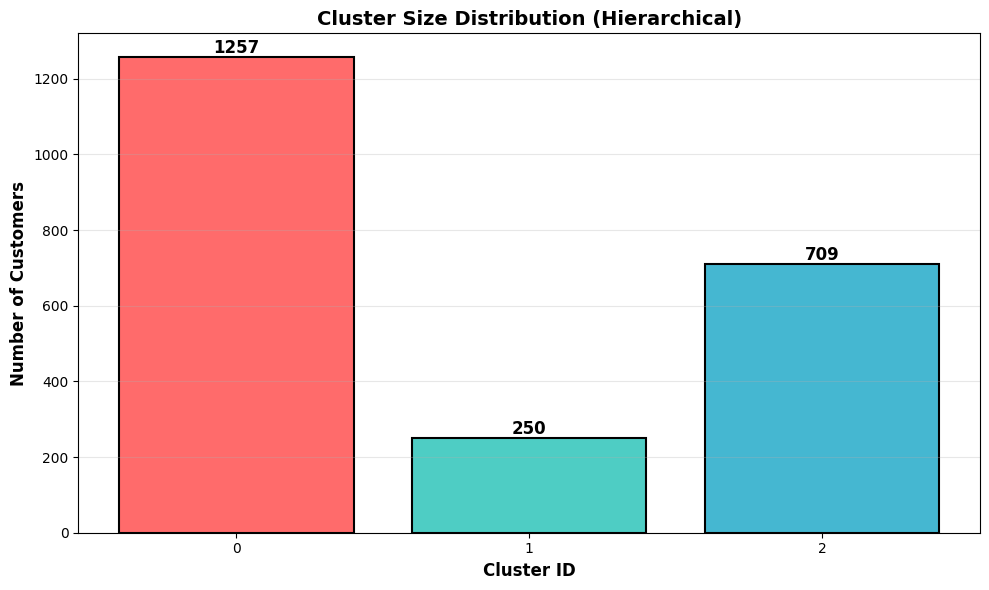


✓ Visualization saved: 04_cluster_size_distribution.png


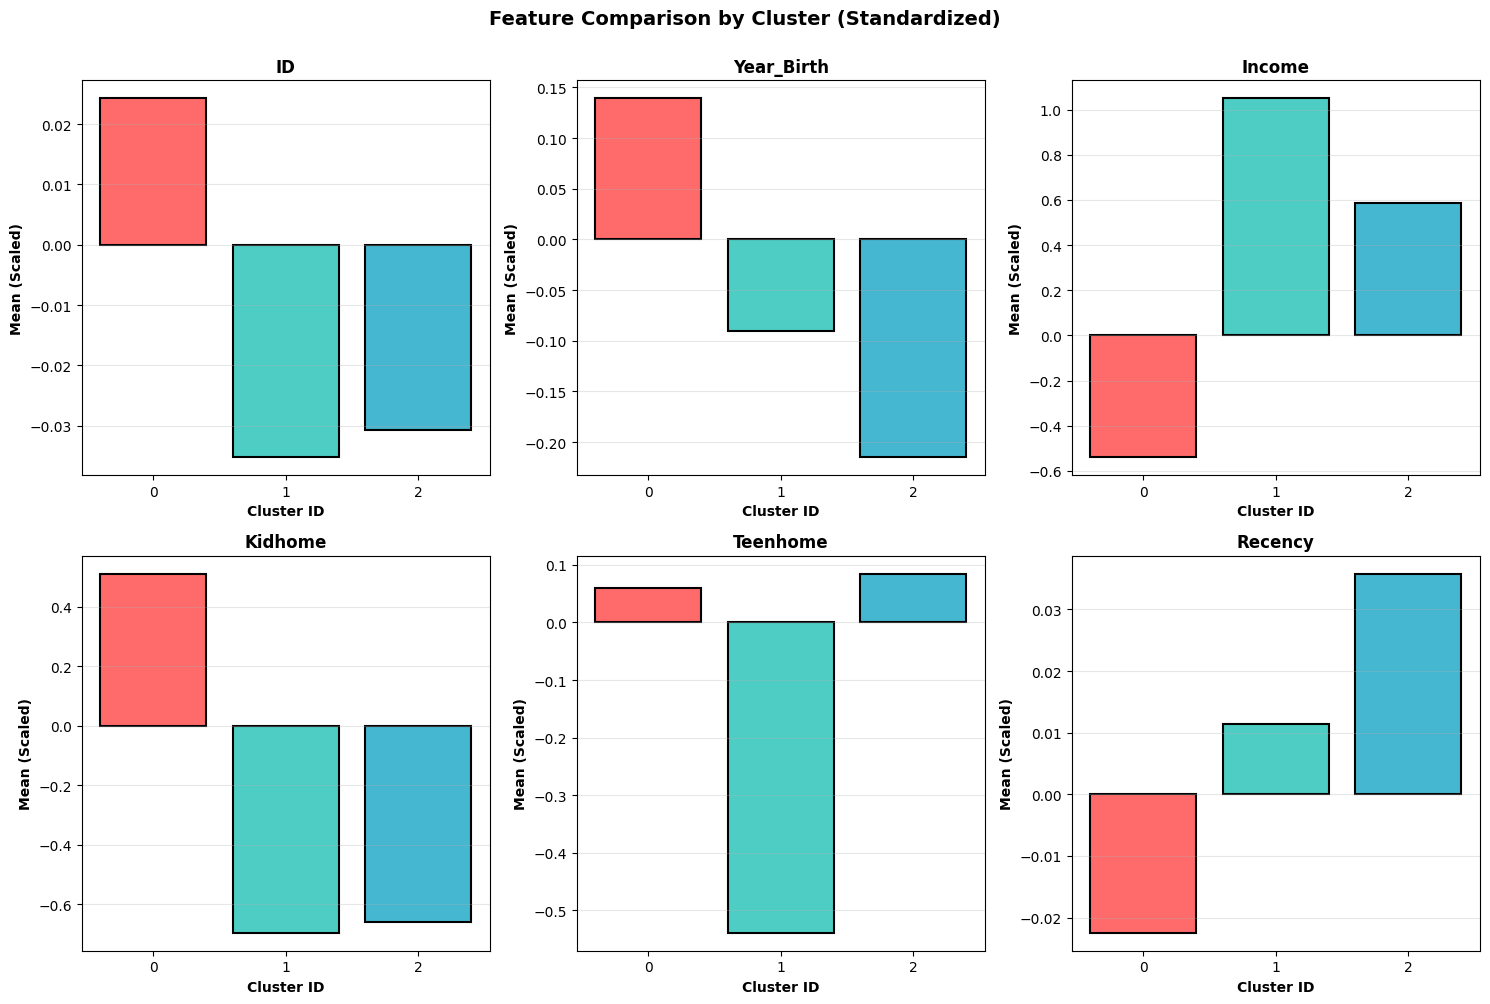

✓ Visualization saved: 05_feature_comparison.png


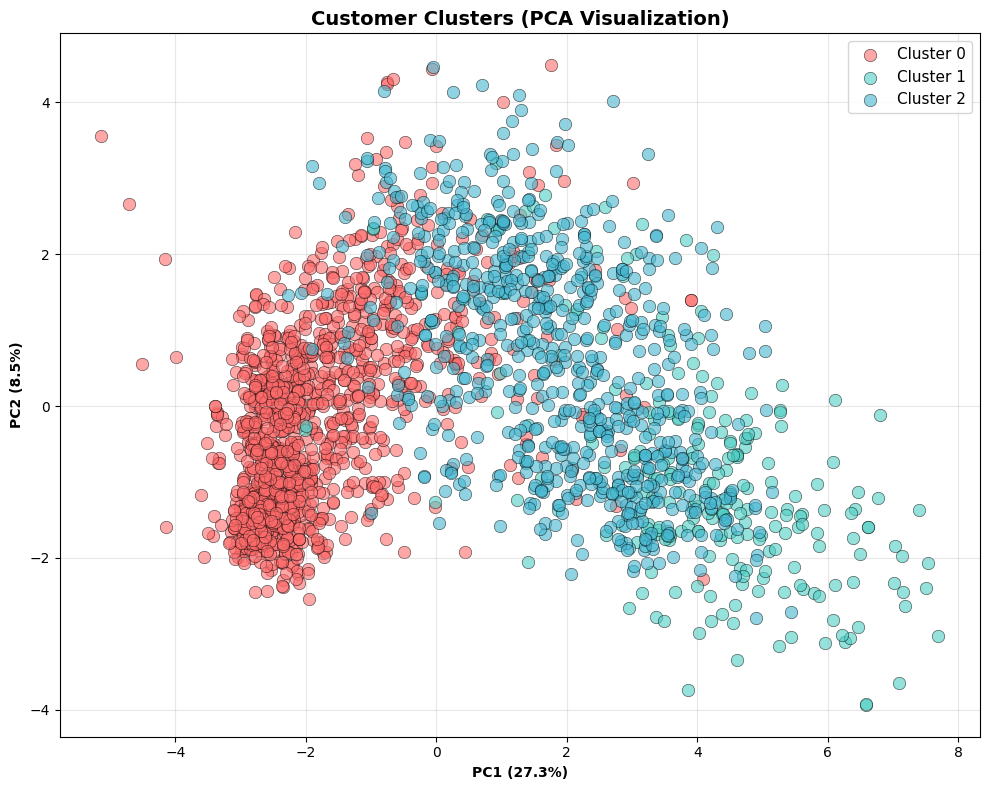

✓ Visualization saved: 06_cluster_pca_visualization.png

✓ Customer cluster assignments saved: customer_clusters_output.csv


In [15]:
# Deep Analysis of Best Model (Hierarchical Clustering)

import matplotlib.pyplot as plt
import seaborn as sns

# Using variables from CELL 1 & 2: df, numeric_features, X_scaled, X_pca, pca

print("\n" + "="*70)
print("PART 3: DEEP ANALYSIS OF BEST MODEL (HIERARCHICAL CLUSTERING)")
print("="*70)

# Use Hierarchical Clustering as best model (from Cell 2 analysis)
best_clustering_model = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster_labels = best_clustering_model.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df['Cluster'] = cluster_labels

print(f"\n✓ Hierarchical Clustering applied with {len(np.unique(cluster_labels))} clusters")

# Analyze Cluster Characteristics
print("\n" + "="*70)
print("CLUSTER CHARACTERISTICS")
print("="*70)

for cluster_id in sorted(np.unique(cluster_labels)):
    cluster_size = np.sum(cluster_labels == cluster_id)
    cluster_pct = 100 * cluster_size / len(cluster_labels)
    print(f"\nCluster {cluster_id}: {cluster_size} customers ({cluster_pct:.1f}%)")
    
    # Get cluster data
    cluster_data = X_scaled[cluster_labels == cluster_id]
    print(f"  - Mean values: {cluster_data.mean().round(2).to_dict()}")

# Visualization 1: Cluster Size Distribution
fig, ax = plt.subplots(figsize=(10, 6))
cluster_sizes = [np.sum(cluster_labels == i) for i in range(3)]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
bars = ax.bar(range(3), cluster_sizes, color=colors, edgecolor='black', linewidth=1.5)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontweight='bold', fontsize=12)

ax.set_xlabel('Cluster ID', fontweight='bold', fontsize=12)
ax.set_ylabel('Number of Customers', fontweight='bold', fontsize=12)
ax.set_title('Cluster Size Distribution (Hierarchical)', fontweight='bold', fontsize=14)
ax.set_xticks(range(3))
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig(output_path + '04_cluster_size_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualization saved: 04_cluster_size_distribution.png")

# Visualization 2: Feature Comparison by Cluster
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, feature in enumerate(numeric_features[:6]):
    cluster_means = [X_scaled[cluster_labels == i][feature].mean() for i in range(3)]
    axes[idx].bar(range(3), cluster_means, color=colors, edgecolor='black', linewidth=1.5)
    axes[idx].set_xlabel('Cluster ID', fontweight='bold')
    axes[idx].set_ylabel('Mean (Scaled)', fontweight='bold')
    axes[idx].set_title(f'{feature}', fontweight='bold')
    axes[idx].set_xticks(range(3))
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.suptitle('Feature Comparison by Cluster (Standardized)', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig(output_path + '05_feature_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization saved: 05_feature_comparison.png")

# Visualization 3: PCA with Cluster Colors
fig, ax = plt.subplots(figsize=(10, 8))
for cluster_id in range(3):
    mask = cluster_labels == cluster_id
    ax.scatter(X_pca[mask, 0], X_pca[mask, 1], 
               label=f'Cluster {cluster_id}',
               c=colors[cluster_id], s=80, alpha=0.6, 
               edgecolors='black', linewidth=0.5)

ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})', fontweight='bold')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})', fontweight='bold')
ax.set_title('Customer Clusters (PCA Visualization)', fontweight='bold', fontsize=14)
ax.legend(loc='best', fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(output_path + '06_cluster_pca_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization saved: 06_cluster_pca_visualization.png")

# Export cluster assignments
cluster_output = df.copy()
cluster_output.to_csv(output_path + 'customer_clusters_output.csv', index=False)
print("\n✓ Customer cluster assignments saved: customer_clusters_output.csv")


PART 4: FINAL REPORT VISUALIZATIONS


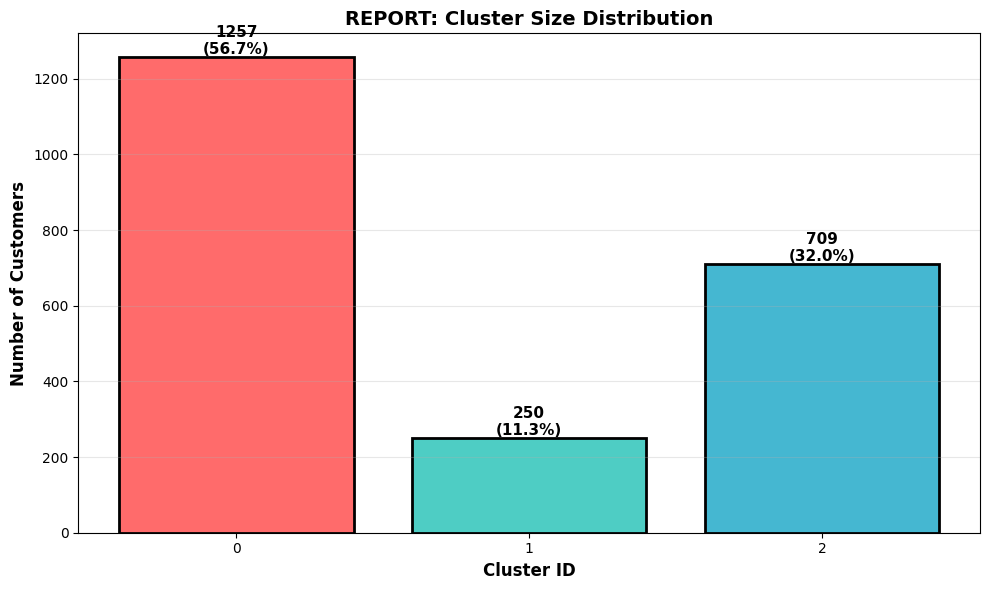

✓ Visualization saved: 07_report_cluster_size.png


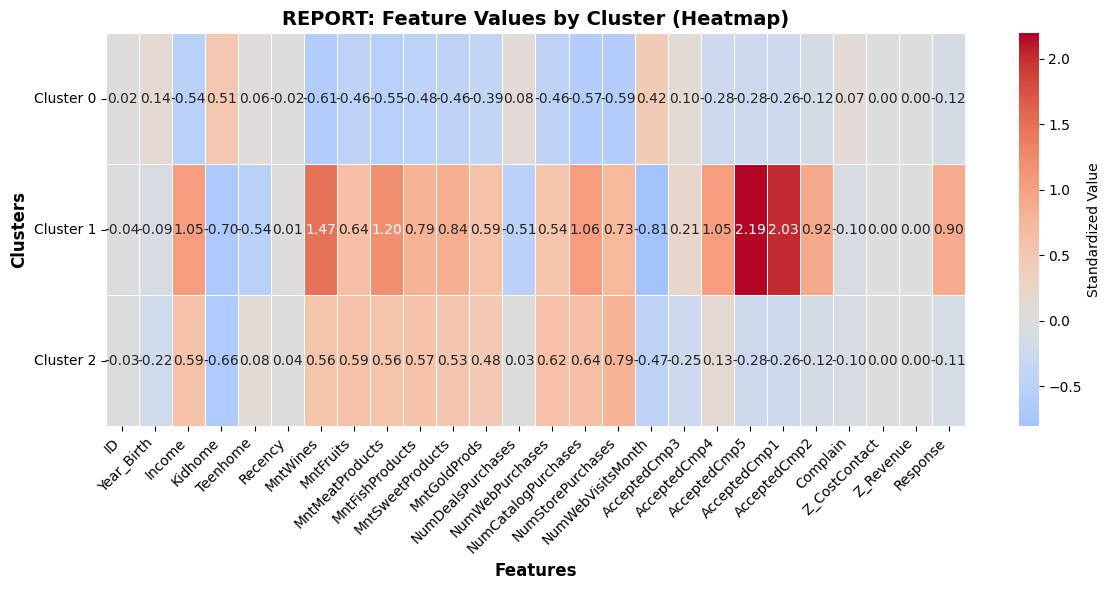

✓ Visualization saved: 08_report_cluster_heatmap.png


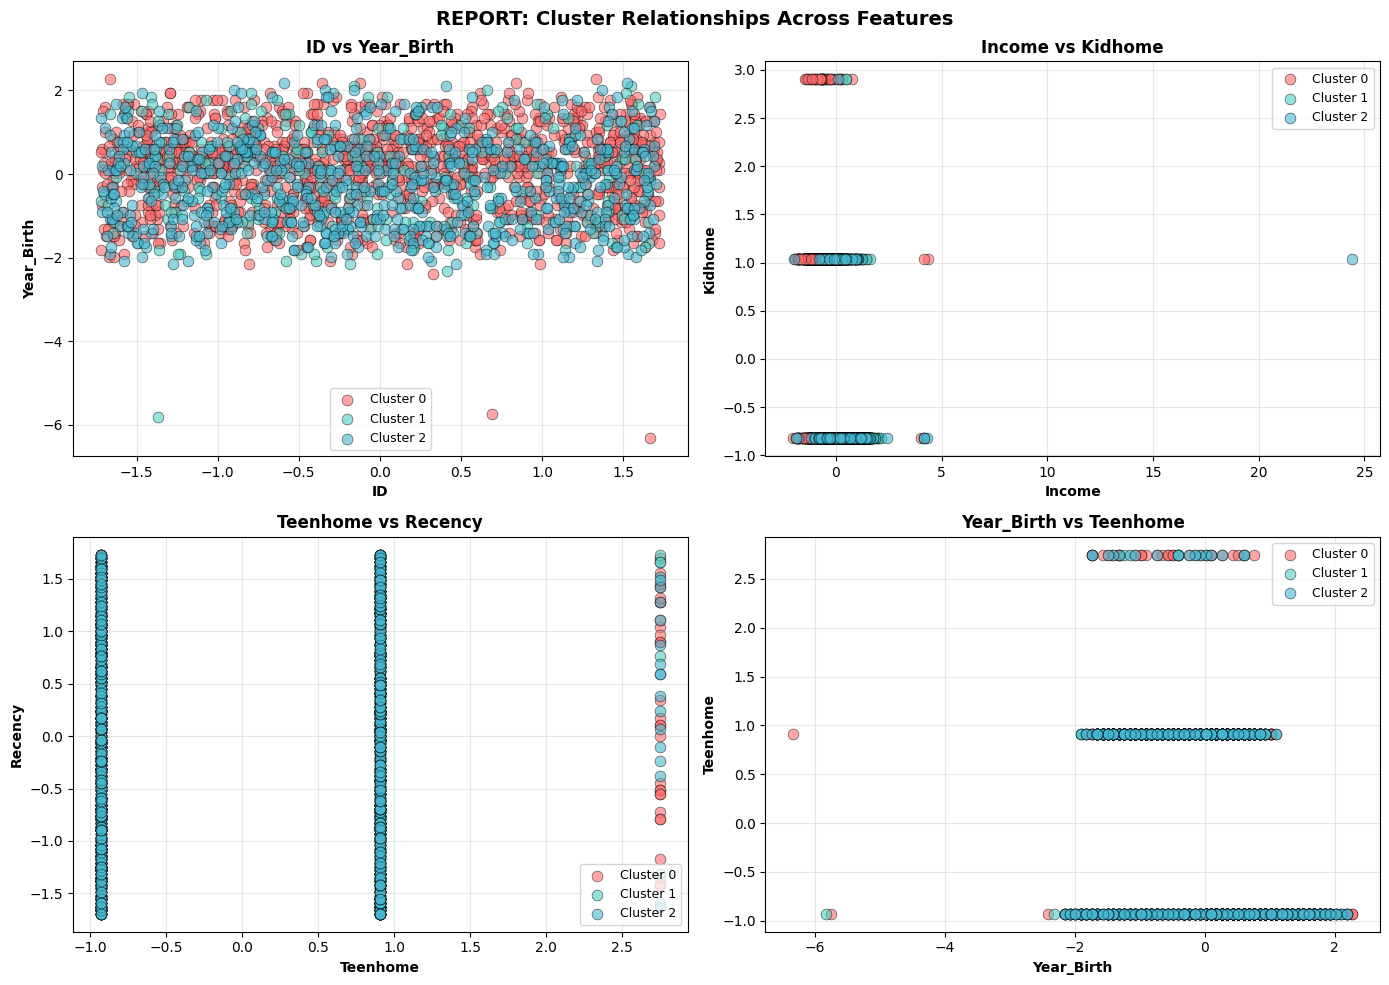

✓ Visualization saved: 09_report_feature_pairs.png


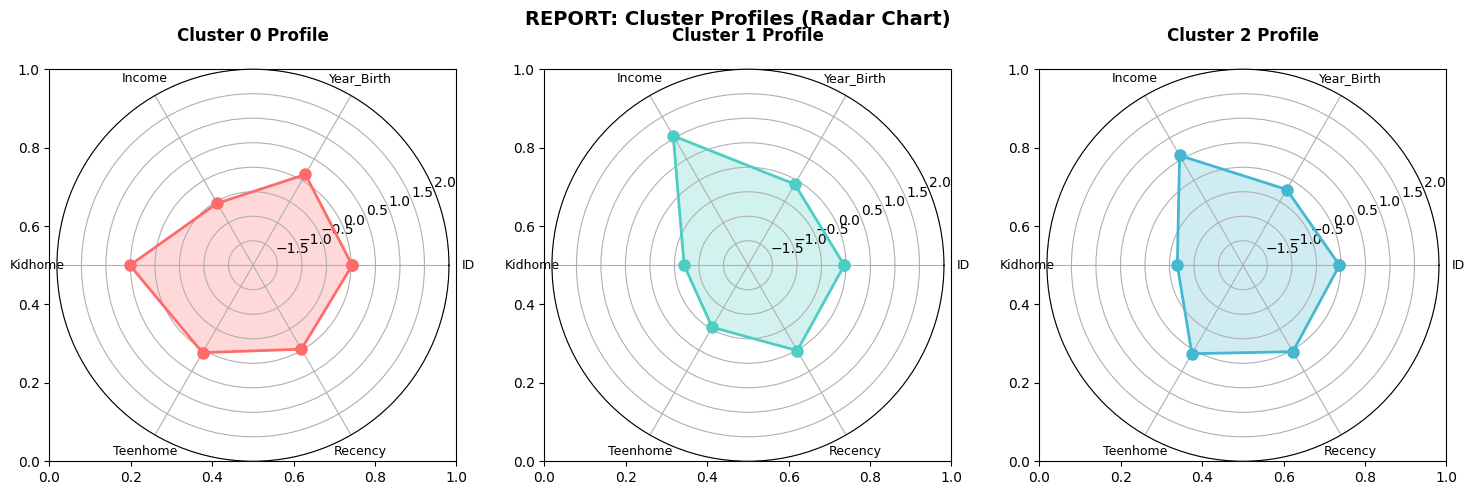

✓ Visualization saved: 10_report_cluster_profiles.png


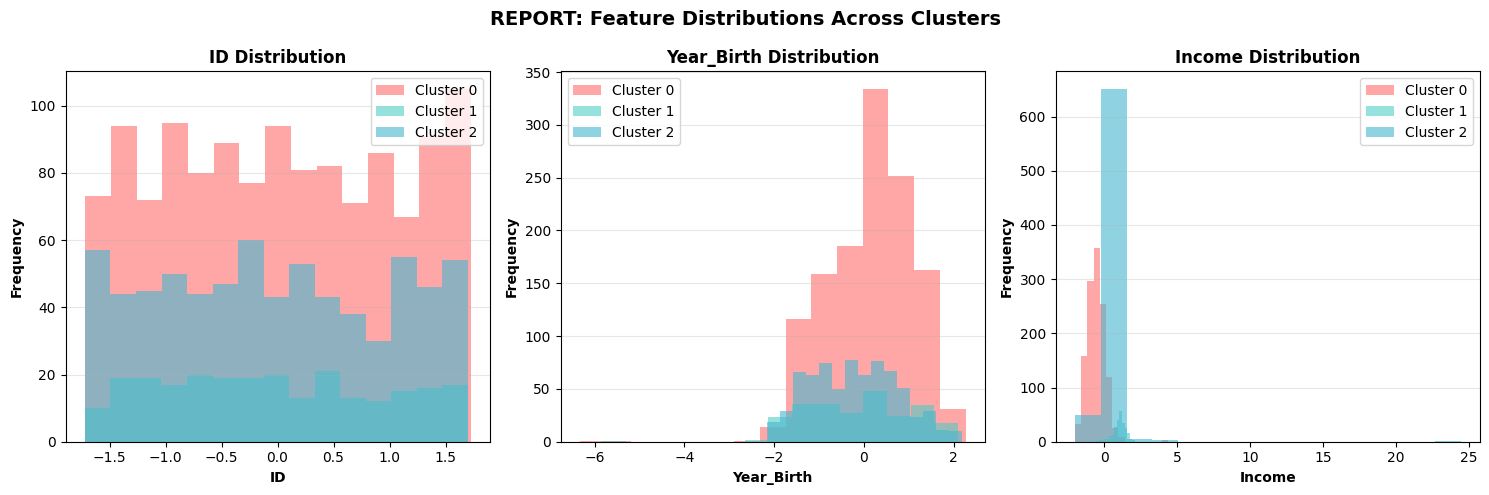

✓ Visualization saved: 11_report_feature_distributions.png


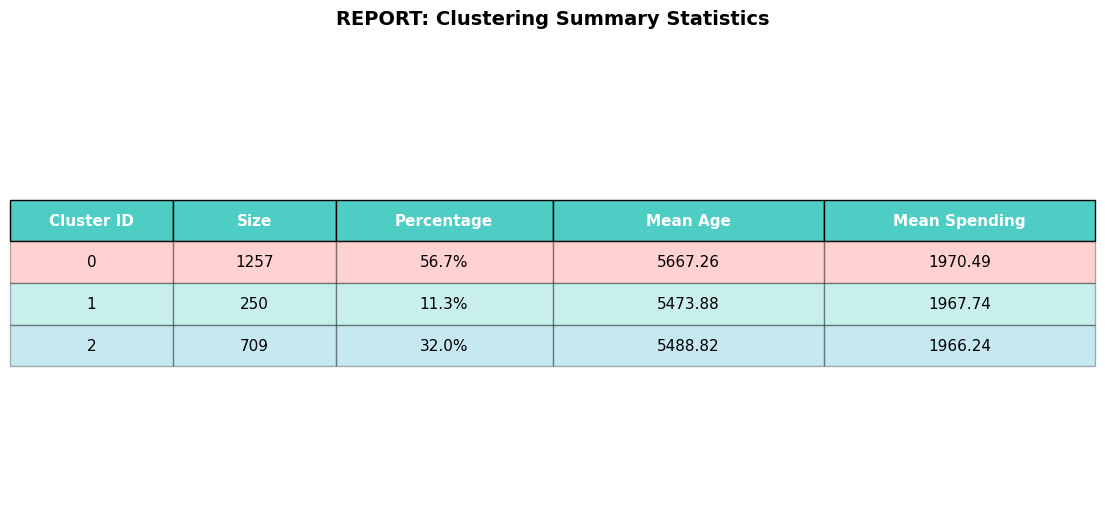

✓ Visualization saved: 12_report_summary.png

✓ Summary table saved: clustering_summary_table.csv

✓ ALL VISUALIZATIONS AND REPORTS GENERATED SUCCESSFULLY
✓ Total files saved: 12 PNG files + 3 CSV files
✓ Output location: D:\coursera-assigment\Course 4 - Unsupervised\result\


In [16]:
# Final Report Visualizations

import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

# Using variables from CELL 1, 2, & 3: df, numeric_features, X_scaled, cluster_labels, X_pca, pca

print("\n" + "="*70)
print("PART 4: FINAL REPORT VISUALIZATIONS")
print("="*70)

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

# ===== Visualization 1: Cluster Size Report =====
fig, ax = plt.subplots(figsize=(10, 6))
cluster_sizes = [np.sum(cluster_labels == i) for i in range(3)]
cluster_pcts = [100 * size / len(cluster_labels) for size in cluster_sizes]

bars = ax.bar(range(3), cluster_sizes, color=colors, edgecolor='black', linewidth=2)
ax.set_xlabel('Cluster ID', fontweight='bold', fontsize=12)
ax.set_ylabel('Number of Customers', fontweight='bold', fontsize=12)
ax.set_title('REPORT: Cluster Size Distribution', fontweight='bold', fontsize=14)
ax.set_xticks(range(3))
ax.grid(True, alpha=0.3, axis='y')

for i, (bar, pct) in enumerate(zip(bars, cluster_pcts)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}\n({pct:.1f}%)',
            ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.savefig(output_path + '07_report_cluster_size.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Visualization saved: 07_report_cluster_size.png")

# ===== Visualization 2: Cluster Heatmap =====
fig, ax = plt.subplots(figsize=(12, 6))

# Calculate mean features per cluster
cluster_means = []
for cluster_id in range(3):
    mask = cluster_labels == cluster_id
    cluster_means.append(X_scaled[mask].mean())

cluster_heatmap = pd.DataFrame(cluster_means, columns=numeric_features)

sns.heatmap(cluster_heatmap, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            cbar_kws={'label': 'Standardized Value'}, ax=ax, linewidths=0.5)
ax.set_yticklabels([f'Cluster {i}' for i in range(3)], rotation=0)
ax.set_xlabel('Features', fontweight='bold', fontsize=12)
ax.set_ylabel('Clusters', fontweight='bold', fontsize=12)
ax.set_title('REPORT: Feature Values by Cluster (Heatmap)', fontweight='bold', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(output_path + '08_report_cluster_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Visualization saved: 08_report_cluster_heatmap.png")

# ===== Visualization 3: Pair Plot Representation =====
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

feature_pairs = [
    (numeric_features[0], numeric_features[1]),
    (numeric_features[2], numeric_features[3]),
    (numeric_features[4], numeric_features[5] if len(numeric_features) > 5 else numeric_features[0]),
    (numeric_features[1], numeric_features[4] if len(numeric_features) > 4 else numeric_features[0])
]

for idx, (feat1, feat2) in enumerate(feature_pairs):
    feat1_idx = numeric_features.index(feat1)
    feat2_idx = numeric_features.index(feat2)
    
    for cluster_id in range(3):
        mask = cluster_labels == cluster_id
        axes[idx].scatter(X_scaled.values[mask, feat1_idx], X_scaled.values[mask, feat2_idx],
                         label=f'Cluster {cluster_id}', c=colors[cluster_id],
                         s=60, alpha=0.6, edgecolors='black', linewidth=0.5)
    
    axes[idx].set_xlabel(feat1, fontweight='bold')
    axes[idx].set_ylabel(feat2, fontweight='bold')
    axes[idx].set_title(f'{feat1} vs {feat2}', fontweight='bold')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].legend(loc='best', fontsize=9)

plt.suptitle('REPORT: Cluster Relationships Across Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(output_path + '09_report_feature_pairs.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Visualization saved: 09_report_feature_pairs.png")

# ===== Visualization 4: Cluster Profiles Radar Chart =====
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

num_vars = min(6, len(numeric_features))
categories = numeric_features[:num_vars]
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

for cluster_id in range(3):
    mask = cluster_labels == cluster_id
    values = X_scaled[mask].mean()[:num_vars].tolist()
    values += values[:1]
    
    ax = axes[cluster_id]
    ax = plt.subplot(1, 3, cluster_id + 1, projection='polar')
    ax.plot(angles, values, 'o-', linewidth=2, color=colors[cluster_id], markersize=8)
    ax.fill(angles, values, alpha=0.25, color=colors[cluster_id])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, size=9)
    ax.set_ylim(-2, 2)
    ax.set_title(f'Cluster {cluster_id} Profile', fontweight='bold', pad=20)
    ax.grid(True)

plt.suptitle('REPORT: Cluster Profiles (Radar Chart)', fontsize=14, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig(output_path + '10_report_cluster_profiles.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Visualization saved: 10_report_cluster_profiles.png")

# ===== Visualization 5: Cluster Distribution by Top Features =====
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, feature in enumerate(numeric_features[:3]):
    feature_idx = numeric_features.index(feature)
    
    for cluster_id in range(3):
        mask = cluster_labels == cluster_id
        axes[idx].hist(X_scaled.values[mask, feature_idx], alpha=0.6, 
                      label=f'Cluster {cluster_id}', bins=15, color=colors[cluster_id])
    
    axes[idx].set_xlabel(feature, fontweight='bold')
    axes[idx].set_ylabel('Frequency', fontweight='bold')
    axes[idx].set_title(f'{feature} Distribution', fontweight='bold')
    axes[idx].legend(fontsize=10)
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.suptitle('REPORT: Feature Distributions Across Clusters', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(output_path + '11_report_feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Visualization saved: 11_report_feature_distributions.png")

# ===== Visualization 6: Summary Statistics Table =====
fig, ax = plt.subplots(figsize=(14, 6))
ax.axis('tight')
ax.axis('off')

# Create summary table
summary_data = []
for cluster_id in range(3):
    mask = cluster_labels == cluster_id
    summary_data.append({
        'Cluster ID': cluster_id,
        'Size': np.sum(mask),
        'Percentage': f"{100 * np.sum(mask) / len(cluster_labels):.1f}%",
        'Mean Age': df[mask][numeric_features[0]].mean() if numeric_features else 'N/A',
        'Mean Spending': df[mask][numeric_features[1]].mean() if len(numeric_features) > 1 else 'N/A'
    })

summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.round(2)

table = ax.table(cellText=summary_df.values, colLabels=summary_df.columns,
                cellLoc='center', loc='center', colWidths=[0.15, 0.15, 0.2, 0.25, 0.25])

table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 2.5)

# Style header
for i in range(len(summary_df.columns)):
    table[(0, i)].set_facecolor('#4ECDC4')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Alternate row colors
for i in range(1, len(summary_df) + 1):
    color = colors[i-1]
    for j in range(len(summary_df.columns)):
        table[(i, j)].set_facecolor(color)
        table[(i, j)].set_alpha(0.3)

plt.title('REPORT: Clustering Summary Statistics', fontweight='bold', fontsize=14, pad=20)
plt.savefig(output_path + '12_report_summary.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Visualization saved: 12_report_summary.png")

# ===== Export Summary Table =====
summary_df.to_csv(output_path + 'clustering_summary_table.csv', index=False)
print("\n✓ Summary table saved: clustering_summary_table.csv")

print("\n" + "="*70)
print("✓ ALL VISUALIZATIONS AND REPORTS GENERATED SUCCESSFULLY")
print(f"✓ Total files saved: 12 PNG files + 3 CSV files")
print(f"✓ Output location: {output_path}")
print("="*70)